<a href="https://colab.research.google.com/github/TrunnMosby/Cats-Vs-Dogs/blob/master/DOGS_vs_CATS_ipynB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D


In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
import numpy as np
from keras.models import Sequential
import matplotlib.pyplot as plt
import os


In [5]:
_URL='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip=tf.keras.utils.get_file('cats_and_dogs.zip',origin=_URL,extract=True)
PATH=os.path.join(os.path.dirname(path_to_zip),'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 1s 0us/step


In [6]:
train_dir=os.path.join(PATH,'train')
validation_dir=os.path.join(PATH,'validation')

In [7]:
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')


In [11]:
 batch_size=128
 epochs=15
 IMG_HEIGHT=150
 IMG_WIDTH=150

# ImageDataGenerator is used to irst read the images from the disk, then we will decode the content of this images and convert them into proper grid format asper their RGB content.Then we convert them into floating point tensors and then we rescale this tensors to our; werescale this tensors from values between 0 and 255 to values between 0 and 1

In [12]:

train_image_generator=ImageDataGenerator(rescale=1/255)
validation_image_generator=ImageDataGenerator(rescale=1/255)

# flow_from_directory is used to load files from directories


In [13]:
train_data_gen=train_image_generator.flow_from_directory(batch_size=batch_size,
                                                         directory=train_dir,
                                                         shuffle=True,target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                         class_mode='binary')

Found 2000 images belonging to 2 classes.


In [14]:
validation_data_gen=validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                         directory=validation_dir,
                                                         shuffle=True,target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                         class_mode='binary')

Found 1000 images belonging to 2 classes.


In [16]:
train_data_gen

In [17]:
sample_training_images,_=next(train_data_gen)

In [19]:
 model=Sequential([Conv2D(16,3,padding='same',activation='relu'),
                   MaxPooling2D(),
                   Conv2D(32,3,padding='same',activation='relu'),
                   MaxPooling2D(),
                   Flatten(),
                   Dense(512,activation='relu')
                   ,Dense(1,activation='sigmoid')])

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
total_train=2000
total_val=1000

In [29]:
history=model.fit_generator(train_data_gen,steps_per_epoch=total_train//batch_size,
                            epochs=epochs,validation_data=validation_data_gen,
                            validation_steps=total_val//batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
15/15 [==============================] - 47s 3s/step - loss: 1.4510 - accuracy: 0.4911 - val_loss: 0.7144 - val_accuracy: 0.5078
Epoch 2/15
15/15 [==============================] - 49s 3s/step - loss: 0.6694 - accuracy: 0.5967 - val_loss: 0.6561 - val_accuracy: 0.6217
Epoch 3/15
15/15 [==============================] - 46s 3s/step - loss: 0.6005 - accuracy: 0.6912 - val_loss: 0.5992 - val_accuracy: 0.6908
Epoch 4/15
15/15 [==============================] - 45s 3s/step - loss: 0.5088 - accuracy: 0.7585 - val_loss: 0.5829 - val_accuracy: 0.6964
Epoch 5/15
15/15 [==============================] - 45s 3s/step - loss: 0.4169 - accuracy: 0.8221 - val_loss: 0.5649 - val_accuracy: 0.7154
Epoch 6/15
15/15 [==============================] - 46s 3s/step - loss: 0.3130 - accuracy: 0.8755 - val_loss: 0.6135 - val_accuracy: 0.6964
Epoch 7/15
15/15 [==============================] - 45s 3s/step - loss: 0.2302 - acc

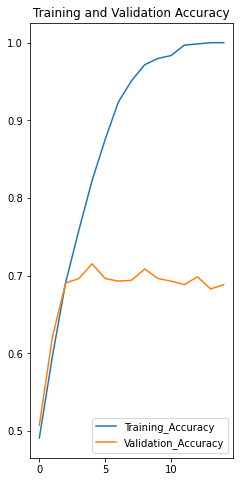

In [33]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range=range(epochs)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training_Accuracy')
plt.plot(epochs_range,val_acc,label='Validation_Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()



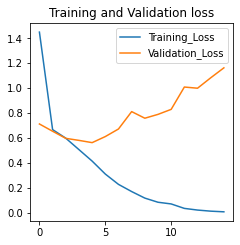

In [35]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.plot(epochs_range,loss,label='Training_Loss')
plt.plot(epochs_range,val_loss,label='Validation_Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')
plt.show()

# We see the model is overfitting

In [36]:
## DATA AUGMENTATION

In [37]:
## APPLYING HORIZONTAL FLIP 
image_gen=ImageDataGenerator(rescale=1/255,horizontal_flip=True)

In [38]:
train_data_gen=image_gen.flow_from_directory(batch_size=batch_size,directory=train_dir,
                                             shuffle=True,
                                             target_size=(IMG_HEIGHT,IMG_WIDTH))

Found 2000 images belonging to 2 classes.


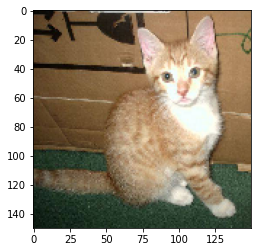

In [40]:
plt.imshow(train_data_gen[0][0][0])

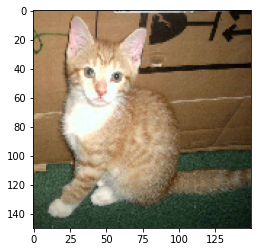

In [52]:
augmented_images=[train_data_gen[0][0][0] for i in range(5)]
plt.imshow(augmented_images[0])


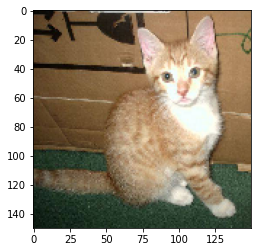

In [53]:
plt.imshow(augmented_images[2])

# Rotaion of images at random angles

In [55]:
image_gen=ImageDataGenerator(rescale=1/255,rotation_range=45)

In [56]:
train_data_gen=image_gen.flow_from_directory(batch_size=batch_size,directory=train_dir,
                                             shuffle=True,
                                             target_size=(IMG_HEIGHT,IMG_WIDTH))

Found 2000 images belonging to 2 classes.


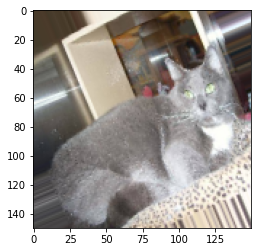

In [57]:
augmented_images=[train_data_gen[0][0][0] for i in range(5)]
plt.imshow(augmented_images[0])

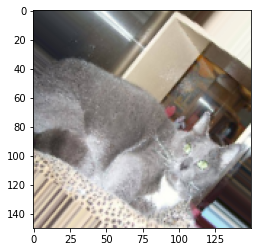

In [58]:
plt.imshow(augmented_images[1])

# APPLYING ZOOM AUGMNETATION

In [59]:
image_gen=ImageDataGenerator(rescale=1/255,zoom_range=0.5)
train_data_gen=image_gen.flow_from_directory(batch_size=batch_size,directory=train_dir,
                                             shuffle=True,
                                             target_size=(IMG_HEIGHT,IMG_WIDTH))

Found 2000 images belonging to 2 classes.


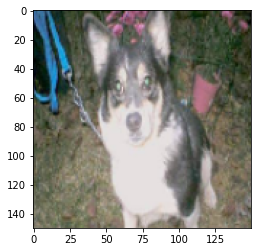

In [60]:
augmented_images=[train_data_gen[0][0][0] for i in range(5)]
plt.imshow(augmented_images[0])

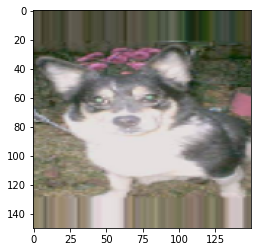

In [62]:
plt.imshow(augmented_images[2])

# USING ALL THE TECHNIQUES TOGETHER

In [65]:
image_gen_train=ImageDataGenerator(rescale=1/255,rotation_range=45,width_shift_range=0.15
                                   ,height_shift_range=0.15,
                                   horizontal_flip=True,
                                   zoom_range=0.5)

In [68]:
train_data_gen=image_gen.flow_from_directory(batch_size=batch_size,directory=train_dir,
                                             shuffle=True,
                                             target_size=(IMG_HEIGHT,IMG_WIDTH),
                                             class_mode='binary')

Found 2000 images belonging to 2 classes.


# DATA AUGMENTATION TO BE APPLIED ONLY ON TRAINING EXAMPLES AND NOT ON VALIDATION EXAMPLES EXCEPT RESCALLING

In [70]:
image_gen_val=ImageDataGenerator(rescale=1/255)

In [71]:
validation_data_gen=image_gen_val.flow_from_directory(batch_size=batch_size,directory=validation_dir,
                                             shuffle=True,
                                             target_size=(IMG_HEIGHT,IMG_WIDTH),
                                             class_mode='binary')

Found 1000 images belonging to 2 classes.


In [73]:
 model_new=Sequential([Conv2D(16,3,padding='same',activation='relu'),
                   MaxPooling2D(),Dropout(0.3),
                   Conv2D(32,3,padding='same',activation='relu'),
                   MaxPooling2D(),Dropout(0.3),
                   Flatten(),
                   Dense(512,activation='relu')
                   ,Dropout(0.1)
                   ,Dense(1,activation='sigmoid')])

In [74]:
model_new.compile(optimizer='adam',loss='binary_crossentropy',
                  metrics=['accuracy'])

In [76]:
history=model_new.fit_generator(train_data_gen,steps_per_epoch=total_train//batch_size,
                            epochs=epochs,validation_data=validation_data_gen,
                            validation_steps=total_val//batch_size)

Epoch 1/15
15/15 [==============================] - 57s 4s/step - loss: 6.8635 - accuracy: 0.4947 - val_loss: 0.8200 - val_accuracy: 0.4967
Epoch 2/15
15/15 [==============================] - 54s 4s/step - loss: 0.8578 - accuracy: 0.5037 - val_loss: 0.6934 - val_accuracy: 0.4598
Epoch 3/15
15/15 [==============================] - 58s 4s/step - loss: 0.6951 - accuracy: 0.4989 - val_loss: 0.6931 - val_accuracy: 0.4989
Epoch 4/15
15/15 [==============================] - 54s 4s/step - loss: 0.6912 - accuracy: 0.5155 - val_loss: 0.6931 - val_accuracy: 0.4967
Epoch 5/15
15/15 [==============================] - 55s 4s/step - loss: 0.6899 - accuracy: 0.5192 - val_loss: 0.6929 - val_accuracy: 0.5234
Epoch 6/15
15/15 [==============================] - 55s 4s/step - loss: 0.6852 - accuracy: 0.5636 - val_loss: 0.6908 - val_accuracy: 0.5748
Epoch 7/15
15/15 [==============================] - 55s 4s/step - loss: 0.6793 - accuracy: 0.5561 - val_loss: 0.6914 - val_accuracy: 0.5402
Epoch 8/15
15/15 [==

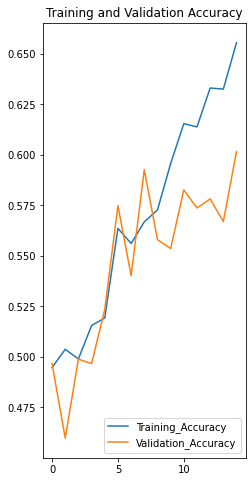

In [77]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range=range(epochs)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training_Accuracy')
plt.plot(epochs_range,val_acc,label='Validation_Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

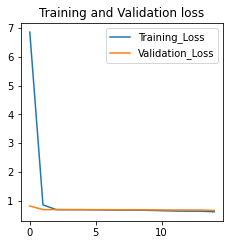

In [78]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.plot(epochs_range,loss,label='Training_Loss')
plt.plot(epochs_range,val_loss,label='Validation_Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')
plt.show()